**Задание 1**

In [15]:
import numpy as np
import scipy.integrate as integrate

In [16]:
# integrate.quad – определенный интеграл
# Сначала указывается функция; -2 и 3: нижний и верхний пределы
first = integrate.quad(lambda x: 2-x, -2, 3)

# first[0]: ответ, first[1]: допустимая погрешность
print(first[0])

7.5


In [17]:
# Двойной интеграл. x - переменная внутреннего интеграла, y - внешнего:
second = integrate.dblquad(  
    lambda x,y: np.power(np.e, x/100) * np.power(np.e, y/1000) ,  # Функция
    1, 10,     # Пределы внешнего (y) интеграла
    1, 10      # Пределы внутреннего(x) интеграла
)
print(second[0]) 

86.08111134115161


**Задание 2**

In [25]:
from scipy.integrate import odeint

def f(y, x):
    return x+1  # dy/dx = x+1, где производная y' по x равна x+1 (т.е правая часть ДУ)


y0 = 1.0    # Начальное значение (y(0) = 1 т.е. x = 0)
k_step = 2  # Количество шагов разбиения отрезка для численного интегрирования

x_output = np.linspace(0, 1, k_step)    # Массив x_output из k_step элементов (равномерно распределенных значений от 0 до 1)
y_result = odeint(f, y0, x_output)      # Решение ДУ. Параметры: функция, начальное значение, массив элементов. Вывод: массив значений y в точках, заданных в x_output.

y_result = y_result[:, 0]   # : - все строки, 0 элемент (по сути и единственный в данном случае). Итог: одномерный массив 
print(y_result[-1])         # По заданию надо найти значение y(1) => вывожу последний элемент (где x = 1)

# Тоже самое но с меньшим количеством шагов

# x_output = np.linspace(0, 1, int(k_step/100))
# print(odeint(f, y0, x_output)[:, 0][-1])


2.5000000119209598


**Задание 3**

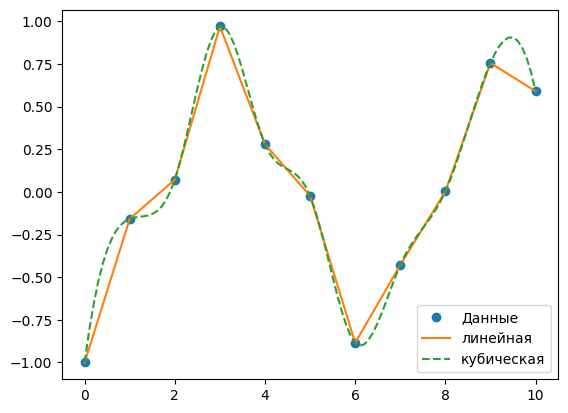

In [19]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.arange(0, 10+1, 1)
y = np.power((-np.cos(x)), 3)  # Значения функции у в точках x

fun_l = interp1d(x, y)  # Вызов линейной интерполяции
fun_c = interp1d(x, y, kind='cubic')   # Вызов кубической интерполяции

x_new = np.linspace(0, 10, num=101, endpoint=True)  # Новые точки x

plt.plot(x, y, 'o', x_new, fun_l(x_new), '-', x_new, fun_c(x_new), '--')
plt.legend(['Данные', 'линейная', 'кубическая'], loc='best')
plt.show()

**Задание 4**

In [20]:
import scipy.stats  # Содержит набор стандартных распределений
from scipy.stats import uniform

a, b = 10, 20
# Генерация выборки из 20 чисел
sample = uniform.rvs(loc=a, scale=b-a, size=20)        # Равномерное распределение
print("Случайная выборка из 20 чисел:", sample)

x = 15
pdf_values = uniform.pdf(x, loc=a, scale=b-a)    # Плотность вероятности
cdf_values = uniform.cdf(x, loc=a, scale=b-a)    # Функция распределения

print(f"Плотность вероятности в точке x = {x}: {pdf_values}")
print(f"Функция распределения в точке x = {x}: {cdf_values}")


Случайная выборка из 20 чисел: [17.97409834 16.85976913 16.01979763 15.40312571 12.6254514  17.55602623
 14.1933863  13.48383443 12.18735929 16.7629241  12.21357218 16.47352811
 19.69308433 10.54828038 19.97956302 12.52214868 18.16402275 11.67274756
 13.30659322 12.4141146 ]
Плотность вероятности в точке x = 15: 0.1
Функция распределения в точке x = 15: 0.5


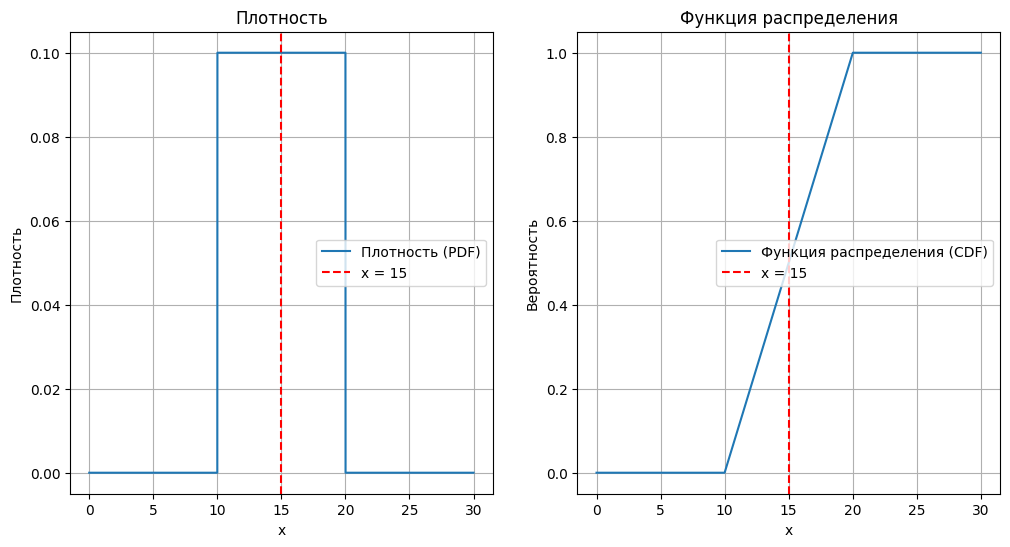

In [21]:
import matplotlib.pyplot as plt

# Диапазон x для построения графиков
x_values = np.linspace(a-10, b+10, 10000)


pdf_values = uniform.pdf(x_values, loc=a, scale=b-a)    # Плотность вероятности

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label='Плотность (PDF)')
plt.title('Плотность')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.grid(True)
plt.axvline(15, color='r', linestyle='--', label='x = 15')
plt.legend()

# График функции распределения
cdf_values = uniform.cdf(x_values, loc=a, scale=b-a)

plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, label='Функция распределения (CDF)')
plt.title('Функция распределения')
plt.xlabel('x')
plt.ylabel('Вероятность')
plt.grid(True)
plt.axvline(15, color='r', linestyle='--', label='x = 15')
plt.legend()

plt.show()

**Задание 5**

In [22]:
import sympy as sp

x = sp.symbols('x')
f = (-3*np.square(x) + x - 3) / (-np.square(x) - x + 3)

limit = sp.limit(f, x, sp.oo)

print(f"Предел функции: {limit}")

Предел функции: 3
